# Introduction to Transmon Physics

## Contents

1. [Multi-level Quantum Systems as Qubits](#mlqsaq)
2. [Hamiltonians of Quantum Circuits](#hoqc)
3. [Quantizing the Hamiltonian](#qth)
4. [The Quantized Transmon](#tqt)
5. [Comparison of the Transmon and the Quantum Harmonic Oscillator](#cottatqho)
6. [Qubit Drive and the Rotating Wave Approximation](#qdatrwa)

## 1. Multi-level Quantum Systems as Qubits <a id='mlqsaq'></a>

Studying qubits is fundamentally about learning the physics of two-level systems. One such example of a purely two-level system is the spin of an electron (or any other spin-$1/2$ particle): it can either point up or down, and we label these states $|0\rangle$ and $|1\rangle$, respectively. Historically, the reason the $|0\rangle$ state is at the "north pole" of the Bloch sphere is that this is the lower-energy state when a magnetic field is applied in the $+\hat{z}$ direction.

Another such two-level system occurs in the first type of superconducting qubit discovered: the [Cooper Pair Box](https://arxiv.org/pdf/cond-mat/9904003v1.pdf). The reason there is no electrical resistance in superconductors is that electrons combine as Cooper pairs, which take energy to break up (and that energy is not available thermally at low temperatures), because they are effectively attracted to each other. This situation is quite counterintuitive, because electrons are both negatively-charged, they should repel each other! However, in many material systems effective interactions can be mediated by collective effects: one can think of the electrons as being attracted to the wake of other electrons in the lattice of positive charge. The Cooper Pair Box consists of a superconducting island that possesses an extra Cooper pair of charge $2e$ ($|0\rangle$) or does not ($|1\rangle$). These states can be manipulated by voltages on tunnel junctions, and is periodic with "gate" voltage control, so it is indeed a two-level system. 

Qubits encoded as charge states are particularly sensitive to *charge noise*, and this is true of the Cooper Pair Box, which is why it fell out of favor with researchers. Many other quantum systems are not two-level systems, such as atoms that each feature unique spectral lines (energy transitions) that are used by astronomers to determine the composition of our universe. By effectively isolating and controlling just two levels, such as the ground and first excited state of an atom, then you could treat it as a qubit. But what about using other types of superconducing circuits as qubits? The solution to the charge noise problem of the Cooper Pair Box hedged on designing a qubit with higher-order energy levels: the [transmon](https://arxiv.org/pdf/cond-mat/0703002.pdf). (The name is derived from *transmission-line shunted plasma oscillation* qubit). By sacrificing anharmonicity (the difference between the $|0\rangle \to |1\rangle$ and $|1\rangle \to |2\rangle$ transition frequencies, see section on [Accessing Higher Energy States](https://qiskit.org/textbook/ch-quantum-hardware/accessing_higher_energy_states.html)), charge noise is suppressed while still allowing the lowest two levels to be addressed as a qubit. Now the quantum states are encoded in oscillations of Cooper Pairs across a tunnel junction between two superconducting islands, with the excited $|1\rangle$ state oscillating at a high frequency than the ground $|0\rangle$.

## 2. Hamiltonians of Quantum Circuits <a id='hoqc'></a>

The Hamiltonian is a function that equals the total energy of a system, potential and kinetic. This is true in classical mechanics, and the quantum Hamiltonian is found by promoting the variables to operators. By comparing classical Poisson backets to quantum commutators, it is found that they do not commute, meaning they cannot be observed simultaneously, as in Heisenberg's uncertainty principle.

We'll first consider a linear $LC$ circuit, where $L$ is the inductance and $C$ is the capacitance. The Hamiltonian is the sum of the kinetic energy (represented by charge variable $Q$) and potential energy (represented by flux variable $\Phi$),
$$
\mathcal{H} = \frac{Q^2}{2C} + \frac{\Phi^2}{2L}
$$

<details>
    <summary>Branch-Flux Method for Linear Circuits (click here to expand)</summary>

Hamiltonians and Lagrangians are functions involving the energies of massive objects and have a rich history in the dynamics of classical systems. They still serve as a template for "quantizing" objects, including the transmon. The method consists of writing the Lagrangian in terms of generalized coordinate: we will choose a quantity called flux that is defined by the history of voltages, classically one often chooses position in 3-dimensional space. The conjugate variable to our generalized coordinate is then calculated, and will end up being charge in our case (usually momentum in the classical case). By way of a Legendre transformation, the Hamiltonian is calculated, which represents the sum of energies of the system.
    
The circuit Hamiltonian can be found by considering the capacitative and inductive energies using the branch-flux method, which itself is based on classical Lagrangian mechanics. Defining the flux and charge to be time integrals of voltage and current, respectively,
$$
\Phi(t) = \int_{-\infty}^t V(t')\,dt' \quad {\rm and} \quad Q(t) = \int_{-\infty}^t I(t')\,dt' 
$$
we will work with flux $\Phi$ as our generalized coordinate, where $V(t')$ and $I(t')$ are the voltage and current flowing across the transmon at time $t'$. In electric circuits, voltage functions much like potential energy and current like kinetic energy. The instantaneous energy across the transmon at time $t$ is 
$$
E(t) = \int_{-\infty}^t V(t') I(t')\,dt'.
$$
The voltage and current across a capacitor (with capacitance $C$) and inductor (with inductance $L$), are related to each other by $V=L dI/dt$ and $I = C dV/dt$, respectively. In circuits, capacitors store charge and inductors store flux (current). We will work with the flux as our "coordinate" of choice. Then because inductors store flux, the potential energy is represented as
$$
U_L(t) = \int_{-\infty}^t L\frac{dI(t')}{dt'} I(t')\, dt' = \frac{1}{2} LI(t)^2 = \frac{1}{2L}\Phi^2
\quad {\rm because} \quad
\Phi(t) = \int_{-\infty}^t L \frac{dI(t')}{dt'}\,dt' = LI(t)
$$
by integration by parts. Similarly, voltage is the rate of change of flux, so it corresponds to the kinetic energy
$$
\tau_C(t) = \int_{-\infty}^t C\frac{dV(t')}{dt'} V(t')\, dt' = \frac{1}{2} CV(t)^2 = \frac{1}{2}C\dot{\Phi}^2 \quad {\rm where} \quad \dot{\Phi} = \frac{d\Phi}{dt}
$$
is the common way to denote time derivatives in Lagrangian mechanics. The Lagrangian is defined as the difference between the kinetic and potential energies and is thus
$$
\mathcal{L} = \tau_C - U_L = \frac{1}{2L} \Phi^2 - \frac{1}{2} C \dot{\Phi}^2. 
$$
The dynamics are determined by the Euler-Lagrange equation
$$
0 \equiv \frac{\partial\mathcal{L}}{\partial\Phi} - \frac{d}{dt} \left(\frac{\partial\mathcal{L}}{\partial\dot{\Phi}}\right)  
= \frac{\Phi}{L} + C\ddot{\Phi},
$$
which describes a harmonic oscillator in $\Phi$ with angular frequency $\omega = 1/\sqrt{LC}$ (now two dots corresponds to the second time derivative, $\ddot{\Phi} = d^2\Phi/dt^2$). However, we wish to move to the Hamiltonian framework and quantize from there. While the conjugate coordinate to flux $\Phi$ is defined by
$$
\frac{d\mathcal{L}}{d\dot{\Phi}} = C \dot{\Phi} = CV \equiv Q
$$
it is exactly the same for charge defined above due to the definition of capacitance. Now, the Hamiltonian is defined in terms of the Lagrangian as $\mathcal{H} = Q\dot{\Phi} - \mathcal{L}$, and one arrives at the equation above.
    
    
</details>




## 3. Quantizing the Hamiltonian <a id='qth'></a>

The quantum harmonic oscillator (QHO) is what we get when we quantize the Hamiltonian of an $LC$ circuit. Promote the conjugate variables to operators, $Q \to \hat{Q}$, $\Phi \to \hat{\Phi}$, so that the quantized Hamiltonian is
$$
\hat{H} = \frac{\hat{Q}^2}{2C} + \frac{\hat{\Phi}^2}{2L},
$$
where the "hats" remind us that these are quantum mechanical operators. Then make an association between the Poisson bracket of classical mechanics and the commutator of quantum mechanics via the correspondence
$$
\{A,B\} = \frac{\delta A}{\delta \Phi} \frac{\delta B}{\delta Q} - \frac{\delta B}{\delta \Phi} \frac{\delta A}{\delta Q} \Longleftrightarrow
\frac{1}{i\hbar} [\hat{A},\hat{B}] = \frac{1}{i\hbar}\left(\hat{A}\hat{B} - \hat{B}\hat{A}\right),
$$
where the $\delta$'s here represent functional derivates and the commutator reflects that the order of operations matter in quantum mechanics. Inserting our variables/operators, we arrive at
$$
\{\Phi,Q\} = \frac{\delta \Phi}{\delta \Phi}\frac{\delta Q}{\delta Q} - \frac{\delta Q}{\delta \Phi}\frac{\delta \Phi}{\delta Q} = 1-0=1 \Longrightarrow [\hat{\Phi}, \hat{Q}] = i\hbar.
$$
This implies, that just like position and momentum, charge and flux also obey a Heisenberg Uncertainty Principle ($[\hat{x},\hat{p}] = i\hbar$, as well). This means that they are not simultaneous observables, and are in fact, conjugate variables defined in the same way with the same properties. This result has been used over the history of superconducting qubits to inform design decisions and classify the types of superconducting qubits. 

The above quantized Hamiltonian is usually written in a friendlier form using the reduced charge $\hat{n} = \hat{Q}/2e$ and phase $\hat{\phi} = 2\pi\hat{\Phi}/\Phi_0$, where $\Phi_0 = h/2e$ is the flux quanta, corresponding to the operators for the number of Cooper pairs and the phase across the Josephson junction, respectively. Then, the quantized Hamiltonian becomes

$$ \hat{H}_{\rm QHO}= 4E_c\hat{n}^2 + \frac{1}{2} E_L \hat{\phi}^2,$$

where $E_c = e^2/2C$ is the charging energy (the 4 in front corresponds to the fact we're dealing with Cooper pairs, not single electrons) and $E_L = (\Phi_0/2\pi)^2/L$ is the inductive energy.

<details>
    <summary>Click to Expand: The Quantum Harmonic Oscillator</summary>

The Hamiltonian above represents a simple harmonic oscillator, and taking $\hat{\phi}$ as the position variable, then we can define creation and annihilation operators in terms of the zero-point fluctuations of the charge and phase,

$$ \hat{n} = i n_{\mathrm zpf}(\hat{a} + \hat{a}^\dagger) \quad \mathrm{and} \quad 
   \hat{\phi} = \phi_{\mathrm zpf}(\hat{a} - \hat{a}^\dagger), \qquad \mathrm{where} \quad 
   n_\mathrm{zpf} = \left( \frac{E_L}{32E_c} \right)^{1/4} \quad \mathrm{and} \quad
   \phi_{\mathrm{zpf}} = \left(\frac{2E_c}{E_L}\right)^{1/4}.$$
   
The Hamiltonian is then that of a harmonic oscillator,

$$ H_{\mathrm{QHO}} = \hbar \omega \left( \hat{a}^\dagger \hat{a} + \frac{1}{2} \right) \qquad \mathrm{with} \qquad
\omega = \sqrt{8 E_L E_c}/\hbar = 1/\sqrt{LC}.$$ 

Here we see that the energy spacing of the QHO corresponds to the classical resonance frequency $\omega=1/\sqrt{LC}$ of an $LC$ oscillator.
</details>

<details>
    <summary>Click to Expand: The Branch-Flux Method for Transmons</summary>

While the above concerns quantizing a linear circuit, [Vool and Devoret](https://arxiv.org/abs/1610.03438) discuss the branch-flux method for quantizing circuits in general. Basically, this gives us a systematic way of enforcing Kirchhoff's Laws for circuits: the sum of the currents at a node must equal zero and the addition of voltages around any loop must also equal zero. These Kirchhoff Laws give us the equations of motion for the circuit.
    
There is a very special relationship between the current and flux in Josephson junctions, given by the Josephson relation
$$
I = I_0 \sin\left(2\pi \Phi/\Phi_0\right)
$$
where $I_0$ is the maximum current (critical current) that can flow through the junction while maintaining a superconducting state, and $\Phi_0 = h/2e$ is the flux quantum. Enforcing Kirchhoff's current law, the sum of the Josephson current and the current across the total capacitance $C = C_S + C_J$, where $C_S$ is the shunt capacitor and $C_J$ is the capacitance of the Josephson junction and $C_S \gg C_J$, must vanish. This gives us an equation of motion
$$
I_0 \sin\left(2\pi \Phi/\Phi_0\right) + C\ddot{\Phi} = 0.
$$
Unlike the typical situation where the equations of motions are calculated by placing the Lagrangian into the Euler-Lagrange equation as we did in the case of the QHO, here we already have the equation of motion for the variable $\Phi$. But since we want to quantize the Hamiltonian, we much convert this equation of motion to a Lagrangian and then perform a Legendre transform to find the Hamiltonian. This is achieved by "integrating" the equation of motion:
$$
0 = \frac{\partial\mathcal{L}}{\partial\Phi} - \frac{d}{dt}\left(\frac{\partial\mathcal{L}}{\partial\dot{\Phi}}\right) = I_0 \sin\left(2\pi \Phi/\Phi_0\right) + C\ddot{\Phi} \Longrightarrow
\frac{I_0 \Phi_0}{2\pi} \cos\left(2\pi \Phi/\Phi_0\right) + \frac{C\dot{\Phi}^2}{2} = \mathcal{L}
$$
Now that we have gone "backward" to find the Lagrangian, we can continue forward to find the Hamiltonian by finding the conjugate variable $Q = \partial \mathcal{L}/\partial\dot{\Phi} = C\dot{\Phi}$, which turns out to be  the same as in the QHO case, and 
$$
\mathcal{H} = Q\dot{\Phi} - \mathcal{L} = \frac{Q^2}{2C} - \frac{I_0 \Phi_0}{2\pi} \cos\left(2\pi \Phi/\Phi_0\right)
$$
    </details>

## 4. The Quantized Transmon <a id='tqt'></a>

Making the same variable substitutions as for the QHO, we can rewrite the transmon Hamiltonian in familiar form
$$
\hat{H}_{\rm tr} = 4E_c \hat{n}^2 - E_J \cos \hat{\phi},
$$
where the Josephson energy $E_J = I_0\Phi_0/2\pi$ replaces the inductive energy from the QHO. Note that the functional form of the phase is different from the QHO due to the presence of the Josephson junction instead of a linear inductor. Often $\hat{n} \to \hat{n} - n_g$ to reflect a gate offset charge, but this is not important in the transmon regime. Now we can approach the quantization similarly to the QHO, where we define the creation and annihilation operators in terms of the zero-point fluctuations of charge and phase 
$$ \hat{n} = i n_{\mathrm zpf}(\hat{c} + \hat{c}^\dagger) \quad \mathrm{and} \quad 
   \hat{\phi} = \phi_{\mathrm zpf}(\hat{c} - \hat{c}^\dagger), \qquad \mathrm{where} \quad 
   n_\mathrm{zpf} = \left( \frac{E_J}{32E_c} \right)^{1/4} \quad \mathrm{and} \quad
   \phi_{\mathrm{zpf}} = \left(\frac{2E_c}{E_J}\right)^{1/4},
$$
where the Josephson energy $E_J$ has replaced the linear inductive energy $E_L$ of the QHO. Here we use $\hat{c} = \sum_j \sqrt{j+1} |j\rangle\langle j+1|$ to denote the transmon annihilation operator and distinguish it from the evenly-spaced energy modes of $\hat{a}$. Now, noting that $\phi \ll 1$ because in the transmon regime $E_J/E_c \gg 1$, we can take a Taylor expansion of $\cos \hat{\phi}$ to approximate the Hamiltonian
$$
H = 4E_c n_{zpf}^2 (\hat{c} + \hat{c}^\dagger)^2 - E_J\left(1 - \frac{1}{2} E_J \phi_{zpf}^2 (\hat{c}-\hat{c}^\dagger)^2 + \frac{1}{24} E_J\phi_{zpf}^4(\hat{c}-\hat{c}^\dagger)^4 + \ldots \right) \\
 \approx \sqrt{8 E_c E_J} \left(\hat{c}^\dagger \hat{c} + \frac{1}{2}\right) - E_J - \frac{E_c}{12}(\hat{c}^\dagger + \hat{c})^4,
$$
where it is helpful to observe $4E_c n_{\rm zpf}^2 = (1/2)E_J\phi_{zpf}^2 = \sqrt{2E_cE_J}$. Expanding the terms of the transmon operator $\hat{c}$ and dropping the fast-rotating terms (i.e. those with an uneven number of $\hat{c}$ and $\hat{c}^\dagger$), neglecting constants that have no influence on transmon dynamics, and defining $\omega_0 = \sqrt{8 E_c E_J}$ and identifying $\delta = -E_c$ as the transmon anharmonicity, we have
$$
\hat{H}_{\rm tr} = \omega_0 \hat{c}^\dagger \hat{c} + \frac{\delta}{2}((\hat{c}^\dagger \hat{c})^2 + \hat{c}^\dagger \hat{c})
= \left(\omega_0 + \frac{\delta}{2}\right) \hat{c}^\dagger \hat{c} + \frac{\delta}{2}(\hat{c}^\dagger \hat{c})^2
$$
which is the Hamiltonian of a Duffing oscillator. Defining $\omega \equiv \omega_0+\delta$, we see that the transmon levels have energy spacings that each differ by the anharmonicity, as $\omega_{j+1}-\omega_j = \omega + \delta j$, so that $\omega$ corresponds to "the frequency" of the transmon qubit (the transition $\omega_1-\omega_0$). From the definition of the transmon operator, $\hat{c}^\dagger \hat{c} = \sum_j j |j\rangle \langle j|$, we arrive at
$$
\hat{H}_{\rm tr} = \omega \hat{c}^\dagger \hat{c} + \frac{\delta}{2} \hat{c}^\dagger \hat{c} (\hat{c}^\dagger \hat{c} - 1)
 = \sum_j \left(\left(\omega-\frac{\delta}{2}\right)j + \frac{\delta}{2} j^2\right) |j\rangle\langle j| \equiv \sum_j \omega_j |j\rangle \langle j|
$$
so that
$$
\omega_j = \left(\omega-\frac{\delta}{2}\right)j + \frac{\delta}{2} j^2
$$
are the energy levels of the transmon.

## 5. Comparison of the Transmon and the Quantum Harmonic Oscillator<a id='cottatqho'></a>

The QHO has even-spaced energy levels and the transmon does not, which is why we can use it as a qubit. Here we show the difference in energy levels by calculating them from their Hamiltonians using [`QuTiP`](http://www.qutip.org). 

In [14]:
import numpy as np
import matplotlib.pyplot as plt

E_J = 20e9
w = 5e9
anharm = -300e6

N_phis = 101
phis = np.linspace(-np.pi,np.pi,N_phis)
mid_idx = int((N_phis+1)/2)

# potential energies of the QHO & transmon
U_QHO = 0.5*E_J*phis**2
U_QHO = U_QHO/w
U_transmon = (E_J-E_J*np.cos(phis))
U_transmon = U_transmon/w

In [15]:
# import QuTiP, construct Hamiltonians, and solve for energies

from qutip import destroy
N = 35
N_energies = 5
c = destroy(N)
H_QHO = w*c.dag()*c
E_QHO = H_QHO.eigenenergies()[0:N_energies]
H_transmon = w*c.dag()*c + (anharm/2)*(c.dag()*c)*(c.dag()*c - 1)
E_transmon = H_transmon.eigenenergies()[0:2*N_energies]

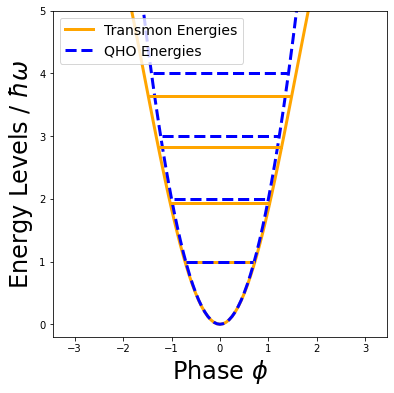

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(6,6))

axes.plot(phis, U_transmon, '-', color='orange', linewidth=3.0)
axes.plot(phis, U_QHO, '--', color='blue', linewidth=3.0)

for eidx in range(1,N_energies):
    delta_E_QHO = (E_QHO[eidx]-E_QHO[0])/w
    delta_E_transmon = (E_transmon[2*eidx]-E_transmon[0])/w
    QHO_lim_idx = min(np.where(U_QHO[int((N_phis+1)/2):N_phis] > delta_E_QHO)[0])
    trans_lim_idx = min(np.where(U_transmon[int((N_phis+1)/2):N_phis] > delta_E_transmon)[0])
    trans_label, = axes.plot([phis[mid_idx-trans_lim_idx-1], phis[mid_idx+trans_lim_idx-1]], \
                             [delta_E_transmon, delta_E_transmon], '-', color='orange', linewidth=3.0)
    qho_label, = axes.plot([phis[mid_idx-QHO_lim_idx-1], phis[mid_idx+QHO_lim_idx-1]], \
                           [delta_E_QHO, delta_E_QHO], '--', color='blue', linewidth=3.0)
    
axes.set_xlabel('Phase $\phi$', fontsize=24)
axes.set_ylabel('Energy Levels / $\hbar\omega$', fontsize=24)
axes.set_ylim(-0.2,5)

qho_label.set_label('QHO Energies')
trans_label.set_label('Transmon Energies')
axes.legend(loc=2, fontsize=14)


## 6. Qubit Drive and the Rotating Wave Approximation <a id='qdatrwa'></a>

Applying an electric drive field $\vec{E}(t) = \vec{E}_0 e^{-i\omega_d t} + \vec{E}_0^* e^{i\omega_d t}$ to the transmon introduces a dipole interaction between the transmon and microwave field. Here we treat the transmon as a qubit for simplicity, so the Hamiltonian is the sum of the qubit Hamiltonian $\hat{H}_0$ and drive Hamiltonian $\hat{H}_d$,
$$
\hat{H} = \hat{H}_0 + \hat{H}_d \qquad {\rm with} \qquad \hat{H}_0 = -\frac{1}{2} \hbar \omega_q \sigma^z,
$$
where $\sigma^z$ is the Pauli-$Z$ matrix. This also allows us to use the Pauli raising/lowering operators $\sigma^\pm = (1/2)(\sigma^x \mp i\sigma^y)$ that have the effect $\sigma^+ |0\rangle = |1\rangle$ and $\sigma^+ |1\rangle = |0\rangle$. (Note that this definition reflects that we are using *qubit* raising/lower operators instead of those for *spin*. For the reason discussed in [Section 1](#mlqsaq), $|0\rangle \equiv |\uparrow\rangle$ and $|1\rangle \equiv |\downarrow \rangle$ so the raising and lowering operators are inverted). Now since the field will excite and de-excite the qubit, we define the dipole operator $\vec{d} = \vec{d}_0 \sigma^+ + \vec{d}_0^* \sigma^-$. The drive Hamiltonian from the dipole interaction is then
$$
\hat{H}_d = -\vec{d} \cdot \vec{E}(t) = -\left(\vec{d}_0 \sigma^+ + \vec{d}_0^* \sigma^-\right) \cdot \left(\vec{E}_0 e^{-i\omega_d t} + \vec{E}_0^* e^{i\omega_d t}\right) = 
-\left(\vec{d}_0 \cdot \vec{E}_0 e^{-i\omega_d t} + \vec{d}_0 \cdot \vec{E}_0^* e^{i\omega_d t}\right)\sigma^+
-\left(\vec{d}_0^* \cdot \vec{E}_0 e^{-i\omega_d t} + \vec{d}_0^* \cdot \vec{E}_0^* e^{i\omega_d t}\right)\sigma^-\\
\equiv -\hbar\left(\Omega e^{-i\omega_d t} + \tilde{\Omega} e^{i\omega_d t}\right)\sigma^+
-\hbar\left(\tilde{\Omega}^* e^{-i\omega_d t} + \Omega^* e^{i\omega_d t}\right)\sigma^-
$$
where we made the substitutions $\Omega = \vec{d}_0 \cdot \vec{E}_0$ and $\tilde{\Omega} = \vec{d}_0 \cdot \vec{E}_0^*$ to describe the strength of the field and dipole. Now we transform to the interaction picture $\hat{H}_{d,I} = U\hat{H}_dU^\dagger$ (omitting terms that cancel for simplicity) with 
$$
U = e^{i\hat{H}_0t/\hbar} = e^{-i\omega_q t \sigma^z/2} = I\cos(\omega_q t/2) - i\sigma^z\sin(\omega_q t/2)
$$
Calculating the operator terms 
$$
\left(I\cos(\omega_q t/2) - i\sigma^z\sin(\omega_q t/2)\right) \sigma^+ \left(I\cos(\omega_q t/2) + i\sigma^z\sin(\omega_q t/2)\right) = e^{i\omega_q t} \sigma^+ \\
\left(I\cos(\omega_q t/2) - i\sigma^z\sin(\omega_q t/2)\right) \sigma^- \left(I\cos(\omega_q t/2) + i\sigma^z\sin(\omega_q t/2)\right) = e^{-i\omega_q t} \sigma^-
$$
the transformed Hamiltonian is
$$
\hat{H}_{d,I} = U\hat{H}_dU^\dagger = -\hbar\left(\Omega e^{-i\omega_d t} + \tilde{\Omega} e^{i\omega_d t}\right)e^{i\omega_q t} \sigma^+ -\hbar\left(\tilde{\Omega}^* e^{-i\omega_d t} + \Omega^* e^{i\omega_d t}\right)e^{-i\omega_q t} \sigma^-\\
= -\hbar\left(\Omega e^{-i\Delta_q t} + \tilde{\Omega} e^{i(\omega_q+\omega_d) t}\right) \sigma^+ -\hbar\left(\tilde{\Omega}^* e^{-i(\omega_q+\omega_d) t} + \Omega^* e^{i\Delta_q t}\right) \sigma^-
$$
Now we make the rotating-wave approximation: since $\omega_q+\omega_d$ is much larger than $\Delta_q = \omega_q-\omega_d$, the terms with the sum in the exponential oscillate much fast, effectively averages out their contributions and we therefore drop those terms from the Hamiltonian. Now the RWA interaction Hamiltonian becomes
$$
\hat{H}_{d,I}^{\rm (RWA)} =-\hbar\Omega e^{-i\Delta_q t}  \sigma^+ -\hbar \Omega^* e^{i\Delta_q t} \sigma^-
$$
Moving back to the Schrödinger picture,
$$
\hat{H}_{d}^{\rm (RWA)} = U^\dagger \hat{H}_{d,I}^{\rm (RWA)} U = -\hbar\Omega e^{-i\omega_d t} \sigma^+ -\hbar\Omega^* e^{i\omega_d t} \sigma^-
$$
so that the total qubit and drive Hamiltonian is
$$
\hat{H}^{\rm (RWA)} = -\frac{1}{2} \hbar\omega_q \sigma^z -\hbar\Omega e^{-i\omega_d t} \sigma^+ -\hbar\Omega^* e^{i\omega_d t} \sigma^-.
$$

Going into the frame of the drive, using the transformation $U_d = \exp\{-i\omega_d t\sigma^z/2\}$, the Hamiltonian becomes
$$
\hat{H}_{\rm eff} = U_d \hat{H}^{\rm (RWA)} U_d^\dagger - i\hbar U_d \dot{U}_d^\dagger
$$
where $\dot{U}_d = dU_d/dt$ is the time derivative of $U_d$. Then in the drive frame under the RWA
$$
\hat{H}_{\rm eff} = -\frac{1}{2} \hbar\omega_q \sigma^z -\hbar\Omega \sigma^+ -\hbar\Omega^* \sigma^- + \frac{1}{2} \hbar\omega_d \sigma^z = -\frac{1}{2}\hbar \Delta_q \sigma^z -\hbar\Omega \sigma^+ -\hbar\Omega^* \sigma^-
$$
assuming the drive is real so that $\Omega = \Omega^*$, this simplifies to
$$
\hat{H}_{\rm eff} = -\frac{1}{2}\hbar \Delta_q \sigma^z -\hbar\Omega \sigma^x.
$$
This shows that when the drive is resonant with the qubit (i.e., $\Delta_q = 0$), the drive causes an $x$ rotation in the Bloch sphere that is generated by $\sigma^x$ with a strength of $\Omega$. We can see the effect of this on-resonant qubit drive in the [finding the frequency of a qubit with spectroscopy](https://qiskit.org/textbook/ch-quantum-hardware/calibrating-qubits-openpulse.html#frequencysweep) section. An off-resonant drive has additional $z$ rotations generated by the $\sigma^z$ contribution, and these manifest themselves oscillations in a [Ramsey experiment](https://qiskit.org/textbook/ch-quantum-hardware/calibrating-qubits-openpulse.html#ramsey).